<a href="https://colab.research.google.com/github/esgardner/Bertelsmann_Challenge_AI/blob/master/Fashion_MNIST_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.


In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [0]:
import torch
from torchvision import datasets, transforms
from torch import nn, optim
import helper
from collections import OrderedDict
import matplotlib.pyplot as plt

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [4]:
# uncomment and run to get helper.py
 #!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

--2020-01-18 01:32:45--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]   2.75K  --.-KB/s    in 0s      

2020-01-18 01:32:45 (55.9 MB/s) - ‘helper.py’ saved [2813/2813]



Here we can see one of the images.

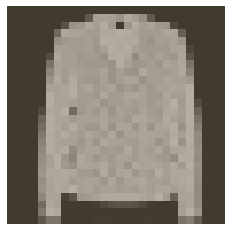

In [20]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [0]:
# Defining network architecture

# set hyperparameters 
input_size = 784
hidden_sizes = [256, 128]
output_size = 10
learning_rate = 0.003

model_dict = OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()), 
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])), 
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.LogSoftmax(dim=1))])




# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [0]:
# Create the network, define the criterion and optimizer

model = nn.Sequential(model_dict)

# loss definition
criterion = nn.NLLLoss()

# define optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)



In [23]:
# Train the network 

# turn on gradients
torch.set_grad_enabled(True)
train_losses = []
epochs = 5
images, label = next(iter(trainloader))
for e in range(epochs):
  total_loss = 0
  for images, labels in trainloader:

    # flatten images into a 1D vecor of length 784
    img = images.view(images.shape[0], -1)
   
    # clear the gradients 
    optimizer.zero_grad()

    # forward pass
    logits = model(img)
    loss = criterion(logits, labels)

    # backward pass to calculate the gradients
    loss.backward()

     # update the weights 
    optimizer.step()
   
    total_loss += loss.item()
   
  else:
    train_losses.append(total_loss / len(trainloader))
    print("Training loss after epoch {} = {}".format(e + 1, total_loss / len(trainloader)))

Training loss after epoch 1 = 0.5002315063784117
Training loss after epoch 2 = 0.38591110654699523
Training loss after epoch 3 = 0.35274477106040475
Training loss after epoch 4 = 0.32509805694984983
Training loss after epoch 5 = 0.31291738828457494


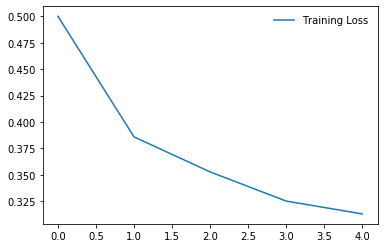

In [24]:
# display plot of the training loss
plt.plot(train_losses, label="Training Loss")
plt.legend(frameon=False)

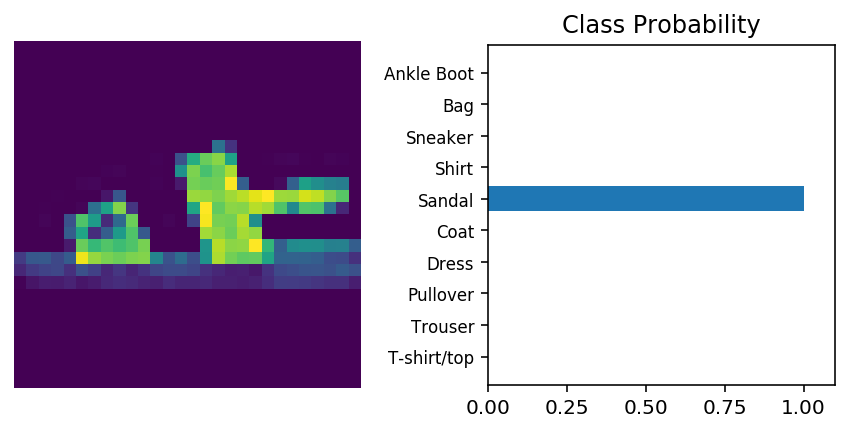

In [32]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]

# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# turn off gradients to speed up remaining calculations
torch.set_grad_enabled(False)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')